In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

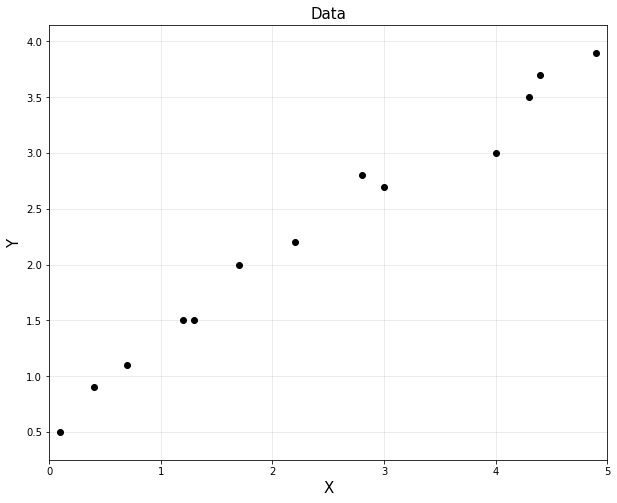

In [2]:
# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1,1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1,1)

plt.figure(figsize=(10,8))
plt.plot(x,y,'ko')
plt.title('Data', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0, 5])
plt.show()

In [3]:
m = y.shape[0]
# A = np.hstack([x, np.ones(m, 1)])
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print('theta:\n', theta)

theta:
 [[0.65306531]
 [0.67129519]]


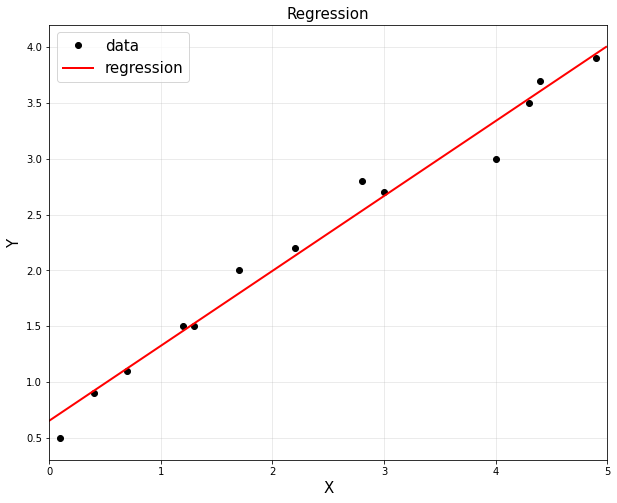

In [4]:
# to plot
plt.figure(figsize=(10, 8))
plt.title('Regression', fontsize=15)
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.plot(x, y, 'ko', label="data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth=2, label="regression")
plt.legend(fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0, 5])
plt.show()

In [5]:
from sklearn import linear_model

In [6]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [7]:
reg.coef_

array([[0.67129519]])

In [8]:
reg.intercept_

array([0.65306531])

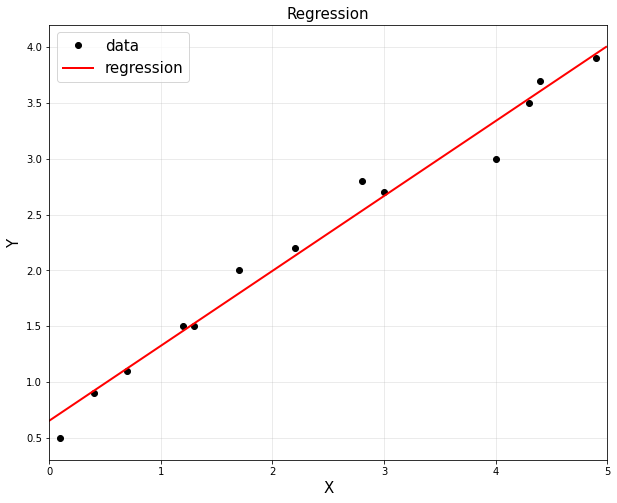

In [9]:
# to plot
plt.figure(figsize=(10, 8))
plt.title('Regression', fontsize=15)
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.plot(x, y, 'ko', label="data")

# to plot a straight line (fitted line)
plt.plot(xp, reg.predict(xp), 'r', linewidth=2, label="regression")
plt.legend(fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0, 5])
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#training data generation
m = 100
x1 = 8*np.random.rand(m,1)
x2 = 7*np.random.rand(m,1) - 4

g = 0.8*x1 + x2 -3

In [12]:
C1 = np.where(g >= 1)
C0 = np.where(g < -1)
print(C1)

(array([11, 17, 21, 25, 28, 30, 44, 45, 47, 60, 62, 67, 71, 72, 79, 80, 90,
       94, 95], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64))


In [15]:
C1 = np.where(g >= 1)[0]
C0 = np.where(g < -1)[0]
print(C1.shape)
print(C0.shape)

(19,)
(49,)


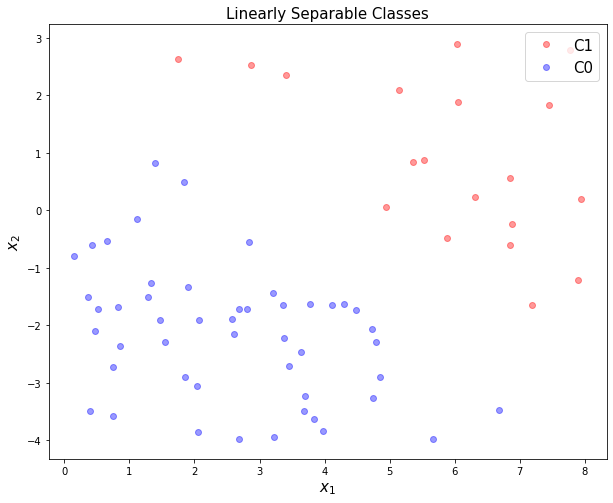

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.title('Linearly Separable Classes', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

In [18]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0],1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [19]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]
flag = 0

while flag == 0:
    flag = 1
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T
            flag = 0

print(w)

[[-17.        ]
 [  5.1838873 ]
 [  9.16275655]]


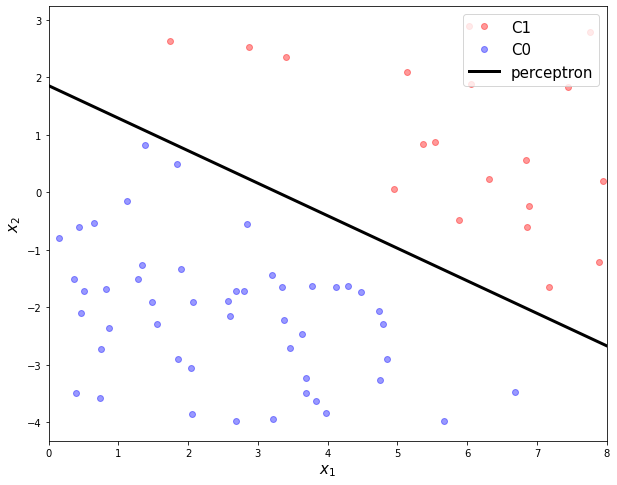

In [20]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = -w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize = (10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, c = 'k', linewidth = 3, label = 'perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.show()

In [21]:
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])